# Example of running MPSlib in Google Colab

## Install MPSlib and scikit-mps (if not allready installed)
scikit-mps can in be installed using 

    pip install scikit-mps
    
and it contains MPSlib binaries for compiled for windows, and on Ubuntu against. Google Colab uses another version of libc and therefor one needs to recompile MPSlib before use.
This can be done by executing the script 'scikit-mps/msplib/bin/install_latest_mpslib.sh. This should be done automatically the first you use this on Google Colab.

In [1]:
module_name='mpslib'
try:
    __import__(module_name)
    print('%s allready installed. skipping installation.' % module_name)
    exe_folder = ''
        
except ImportError:
    import sys
    is_colab = 'google.colab' in sys.modules
    print (is_colab)
    if is_colab:
        print('%s cannot be loaded. trying to install it.' % module_name)
        !pip install scikit-mps pyvista panel

        # Recompile from src on Colab
        import pathlib
        import mpslib as mps
        
        O=mps.mpslib()
        O.compile_mpslib()
        # Next line is needed in GoogleColabe
        !bash mpslib_download_and_install.sh

    else:
        print('Please install MPSlib and scikit-mps from http://github.com/ergosimulation/mpslib/')
    


mpslib allready installed. skipping installation.


In [2]:
import mpslib as mps
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pyvista as pv
plt.rc('figure', figsize=(12.0, 6.0))
pv.set_plot_theme("document")
pv.global_theme.jupyter_backend = 'panel'  # use this in jupyter lab

## Setup MPSlib

File not found in: /mnt/c/Users/thoma/PROGRAMMING/mpslib/scikit-mps/mpslib/bin/mps_genesim


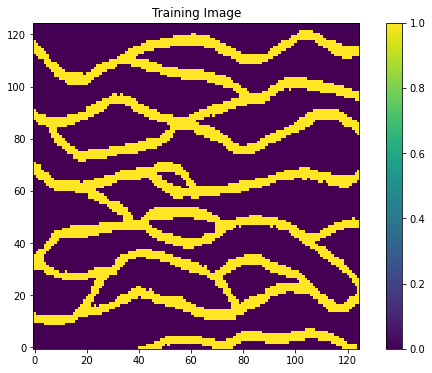

In [3]:
#O = mps.mpslib(method='mps_snesim_tree',simulation_grid_size=np.array([40,20,1]), verbose_level=0, debug_level=-1)
O = mps.mpslib(method='mps_genesim',simulation_grid_size=np.array([40,20,1]), verbose_level=0, debug_level=-1)
O.parameter_filename = 'mps.txt'
O.par['n_real']=50
O.par['n_cond']=25
O.par['template_size']=np.array([[10,5],[10,5],[1,1]])


# hard data
O.d_hard = np.array([[ 10, 5, 0, 1],
                       [ 30, 15, 0, 0]])

# soft data
O.d_soft = np.array([[ 10, 15, 0, 0.9, 0.1],
                       [ 30, 5, 0, 0.9, 0.1]])

# Training Image
TI, TI_filename = mps.trainingimages.strebelle(di=2, coarse3d=1)
O.ti = TI
mps.plot.plot(O.ti[:,:,1], title='Training Image')

## Run MPSlib

In [4]:
# Serial 
#O.run()
# Parallel
O.run_parallel();

parallel: Using 7 of max 7 threads


## Plot realizations and E-types

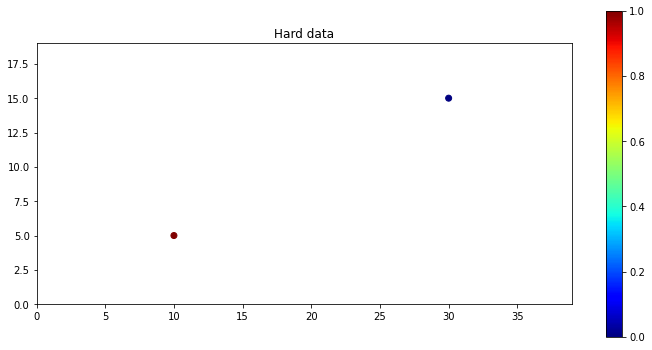

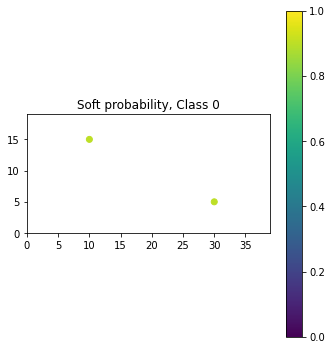

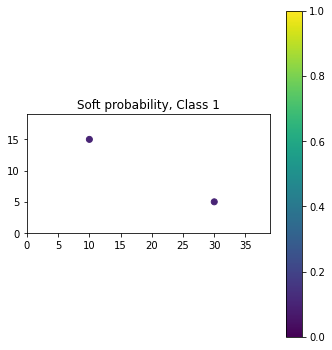

In [5]:
O.plot_hard()
O.plot_soft()

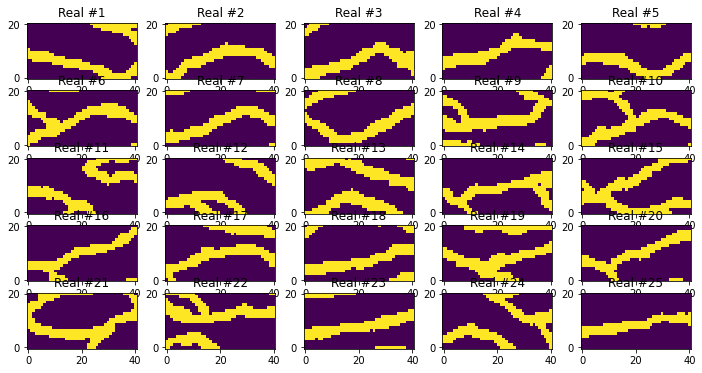

In [6]:
O.plot_reals()

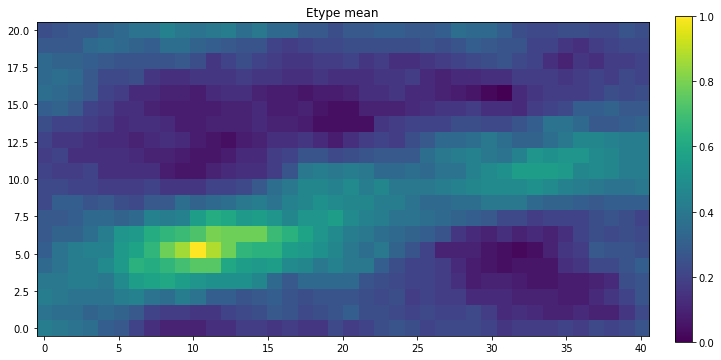

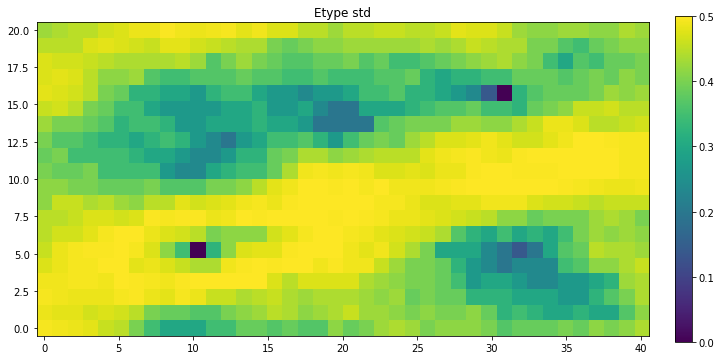

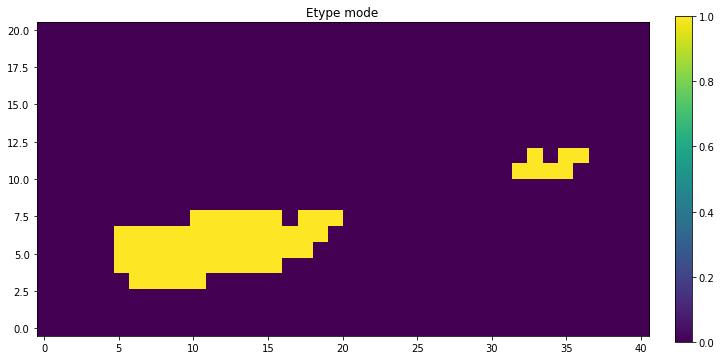

In [7]:
O.plot_etype()

## Estimation

In [8]:
O.par['do_estimation']=1
O.par['do_entropy']=1
O.par['n_real']=1

O.par['n_cond_soft']=2
O.par['n_max_cpdf_count']=1000000

O.run()

loading entropy from ti.dat_ent_0.gslib
loading entropy from ti.dat_cg_0.gslib
loading entropy from ti.dat_cg_1.gslib


True

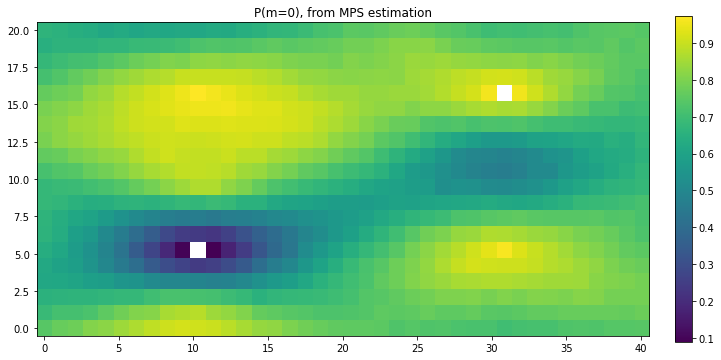

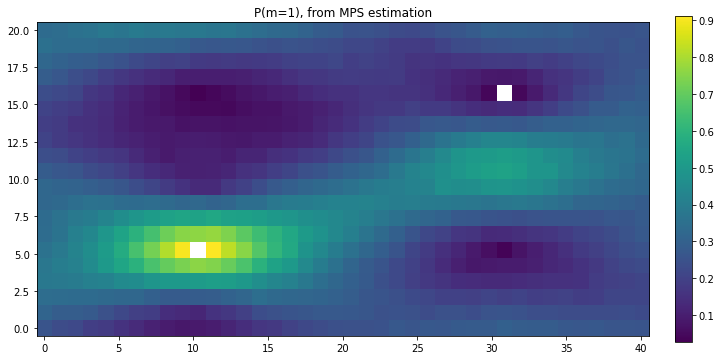

In [10]:
mps.plot.plot(O.est[0][:,:,0], title='P(m=0), from MPS estimation', vmin=0)
mps.plot.plot(O.est[1][:,:,0], title='P(m=1), from MPS estimation')